In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astropy.timeseries import LombScargle
from constants import DATA_DIR
from numpy.polynomial import Chebyshev
from scipy.interpolate import CubicSpline, make_interp_spline

from astrofit.model.enums import EnumSortOptions
from astrofit.utils import AsteroidLoader, LightcurveBinner, LightcurvePlotter

sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (14, 6)

In [2]:
asteroid_loader = AsteroidLoader(DATA_DIR)
lightcurve_binner = LightcurveBinner()
lightcurve_plotter = LightcurvePlotter()

In [3]:
asteroid_name = "Kalliope"


In [4]:
asteroid = asteroid_loader.load_asteroid(asteroid_name)
asteroid

Asteroid(id=22, name=Kalliope, period=4.1482015, lightcurves=155)

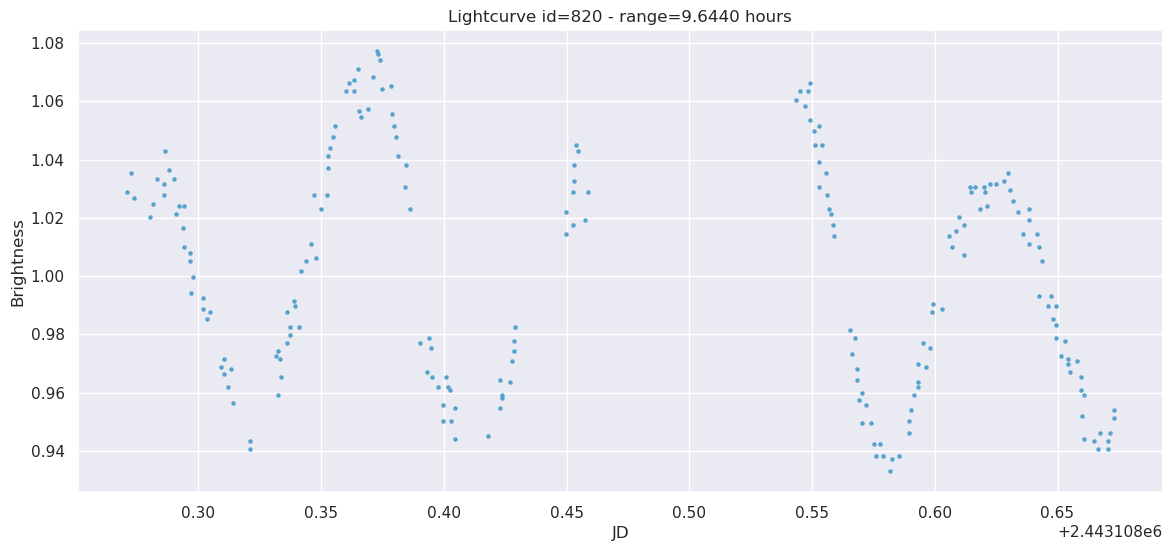

In [5]:
asteroid.get_longest_lightcurve(by=EnumSortOptions.PERIOD).plot()

In [6]:
times = np.array(asteroid.get_longest_lightcurve(by=EnumSortOptions.PERIOD).time_arr)
brightness = np.array(asteroid.get_longest_lightcurve(by=EnumSortOptions.PERIOD).brightness_arr)

In [7]:
def get_uniformly_distributed_data(
    times: np.ndarray,
    brightness: np.ndarray,
    resolution: float = 0.002,
    plot: bool = False,
) -> tuple[np.ndarray, np.ndarray]:
    times_resolution = np.arange(times[0], times[-1] + 0.001, resolution)

    reduced_times = []
    reduced_brightness = []

    prev_time = times_resolution[0]
    for curr_time in times_resolution[1:]:
        mask = np.where((times >= prev_time) & (times < curr_time), True, False)
        if np.any(mask):
            # reduced_times.append(np.mean(times[mask]))
            reduced_times.append(prev_time + (curr_time - prev_time) / 2)
            reduced_brightness.append(np.mean(brightness[mask]))

        prev_time = curr_time

    reduced_times = np.array(reduced_times)
    reduced_brightness = np.array(reduced_brightness)

    if plot:
        plt.scatter(times, brightness, s=8)
        plt.vlines(times_resolution, min(brightness), max(brightness), alpha=0.5)
        plt.show()

        plt.scatter(reduced_times, reduced_brightness, s=8)
        plt.show()

    return reduced_times, reduced_brightness

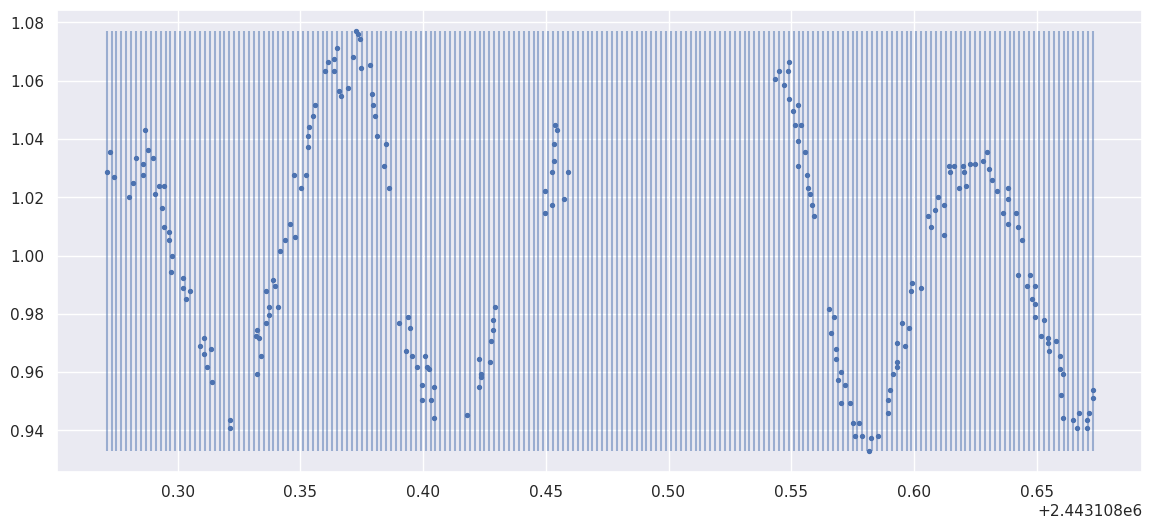

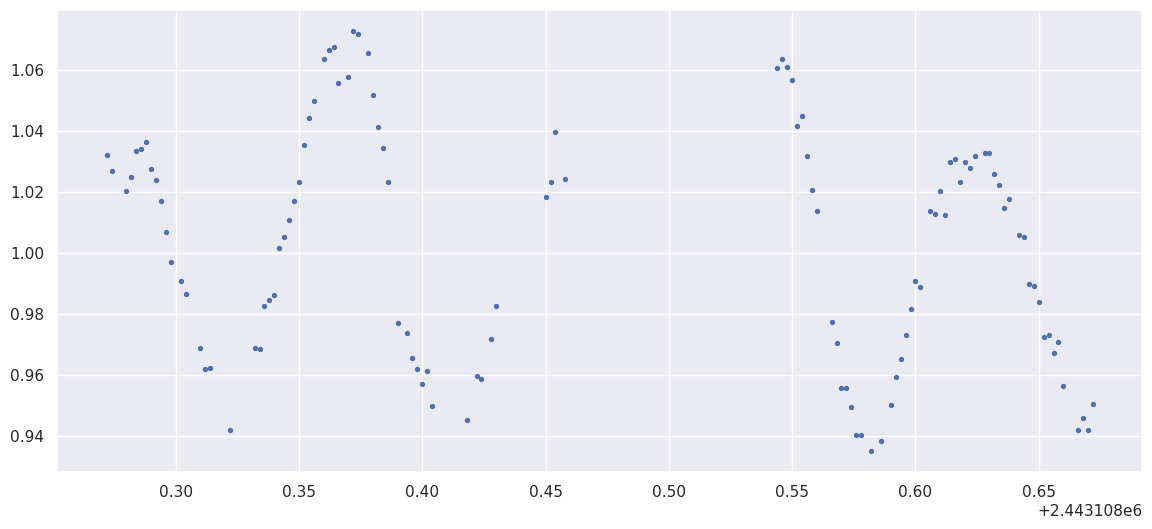

In [8]:
reduced_times, reduced_brightness = get_uniformly_distributed_data(times, brightness, plot=True)

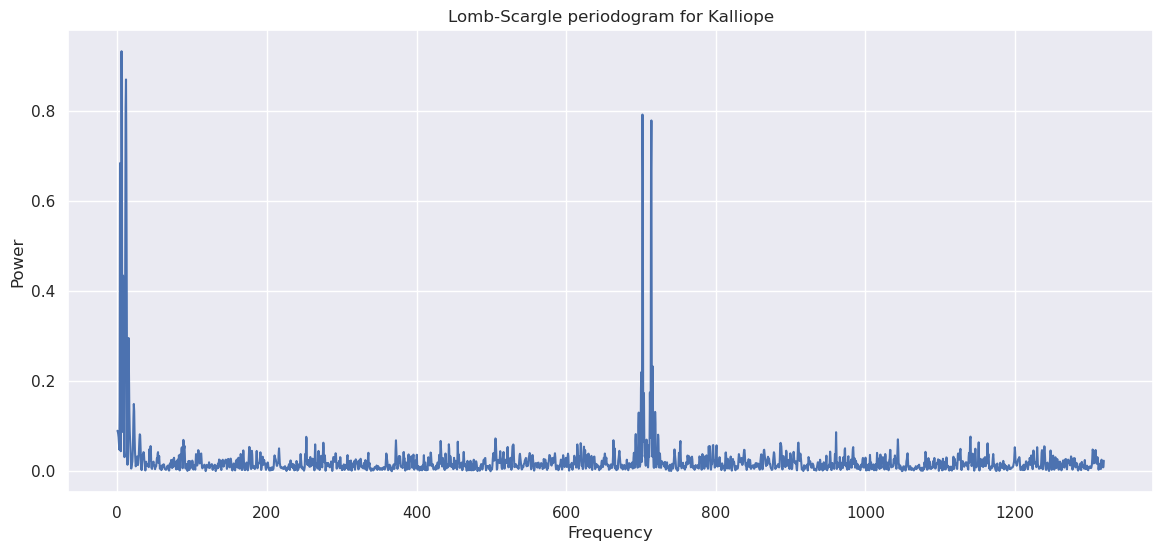

Best frequency: 5.723770818404131
Rotational period: 4.193040001327576h


In [9]:
ls = LombScargle(times, brightness, nterms=2)
frequency, power = ls.autopower()
fig = plt.plot(frequency, power)

plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title(f"Lomb-Scargle periodogram for {asteroid_name}")
plt.show()

top_10_freqs = frequency[np.argsort(power)[-100:]]
top_10_periods = 24 / top_10_freqs

sort_idx = np.argsort(top_10_periods)
top_10_freqs = top_10_freqs[sort_idx]
top_10_periods = top_10_periods[sort_idx]

lomb_freq = frequency[np.argmax(power)]
lomb_period = 24 / lomb_freq

print(f"Best frequency: {lomb_freq}")
print(f"Rotational period: {lomb_period}h")

In [10]:
for ind, period in enumerate(top_10_periods):
    print(f"F: {top_10_freqs[ind]}, P: {period}h")

F: 1163.4186337408396, P: 0.02062885989957952h
F: 1162.9209145392392, P: 0.02063768885737947h
F: 1151.473372902431, P: 0.020842861471911445h
F: 1140.5235504672232, P: 0.021042967495207125h
F: 1140.0258312656229, P: 0.0210521545580734h
F: 1043.4683061551532, P: 0.02300021942059009h
F: 960.8469186894935, P: 0.024977964265872638h
F: 910.5772793278571, P: 0.026356906266885558h
F: 910.0795601262569, P: 0.026371320763066516h
F: 887.1844768526403, P: 0.027051870976306944h
F: 886.6867576510399, P: 0.02706705586038009h
F: 886.1890384494395, P: 0.027082257801329477h
F: 796.5995821613749, P: 0.030128059990794834h
F: 752.8002924205433, P: 0.03188096529935017h
F: 752.3025732189429, P: 0.03190205756881716h
F: 723.4348595261221, P: 0.033175067089967064h
F: 722.9371403245218, P: 0.03319790706730955h
F: 719.4531059133193, P: 0.03335867175044422h
F: 718.9553867117189, P: 0.03338176532728773h
F: 715.9690715021168, P: 0.03352100105336609h
F: 715.4713523005164, P: 0.03354432001062061h
F: 714.4759138973156,

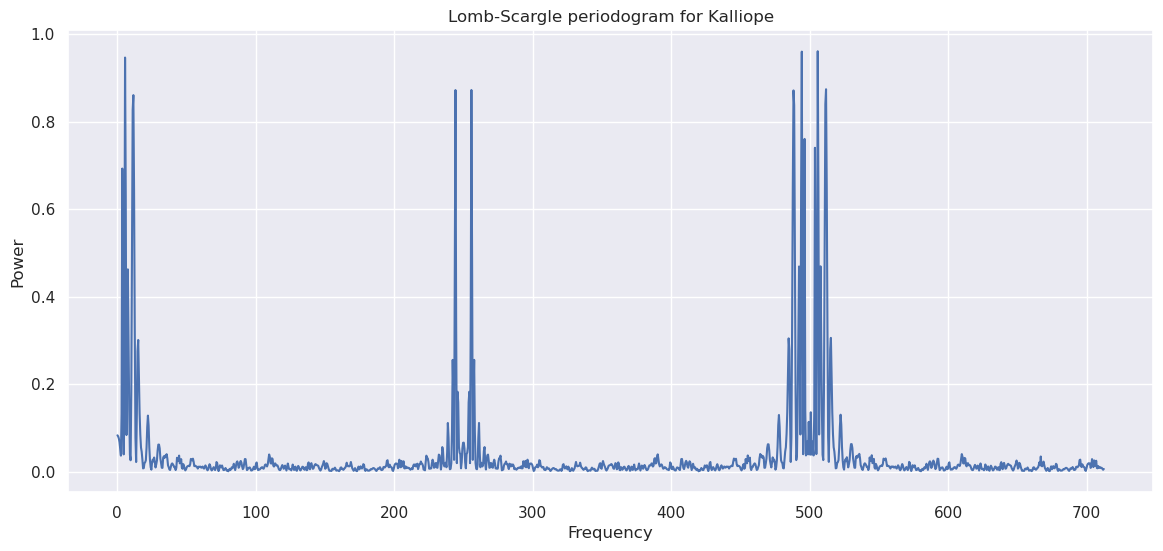

Best frequency: 505.75003485521546
Rotational period: 0.04745427255753061h


In [11]:
ls = LombScargle(reduced_times, reduced_brightness, nterms=2)
frequency, power = ls.autopower()
fig = plt.plot(frequency, power)

plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title(f"Lomb-Scargle periodogram for {asteroid_name}")
plt.show()

top_10_freqs = frequency[np.argsort(power)[-100:]]
top_10_periods = 24 / top_10_freqs

sort_idx = np.argsort(top_10_periods)
top_10_freqs = top_10_freqs[sort_idx]
top_10_periods = top_10_periods[sort_idx]

lomb_freq = frequency[np.argmax(power)]
lomb_period = 24 / lomb_freq

print(f"Best frequency: {lomb_freq}")
print(f"Rotational period: {lomb_period}h")

In [12]:
for ind, period in enumerate(top_10_periods):
    print(f"F: {top_10_freqs[ind]}, P: {period}h")

F: 522.7500360268193, P: 0.04591104418167596h
F: 522.2500359923604, P: 0.0459549992263688h
F: 521.7500359579014, P: 0.04599903851647553h
F: 516.7500356133121, P: 0.046444118714990046h
F: 516.2500355788532, P: 0.0464891009122927h
F: 515.7500355443942, P: 0.04653417032665265h
F: 515.2500355099353, P: 0.04657932721197691h
F: 514.7500354754764, P: 0.04662457182315902h
F: 514.2500354410174, P: 0.04666990441608382h
F: 512.7500353376406, P: 0.046806432659134284h
F: 512.2500353031817, P: 0.04685211975787429h
F: 511.75003526872274, P: 0.046897896132820915h
F: 511.2500352342638, P: 0.04694376204590925h
F: 510.75003519980487, P: 0.04698971776010006h
F: 510.25003516534593, P: 0.047035763539384816h
F: 508.75003506196913, P: 0.04717444392328472h
F: 508.2500350275102, P: 0.04722085262365195h
F: 507.75003499305126, P: 0.047267352724709215h
F: 507.2500349585923, P: 0.047313944496739486h
F: 506.7500349241334, P: 0.04736062821109246h
F: 506.2500348896744, P: 0.04740740414018984h
F: 505.75003485521546, P:

In [13]:
asteroid.period

4.1482015

In [14]:
times_resolution = np.arange(reduced_times[0], reduced_times[-1] + 0.001, 0.002)

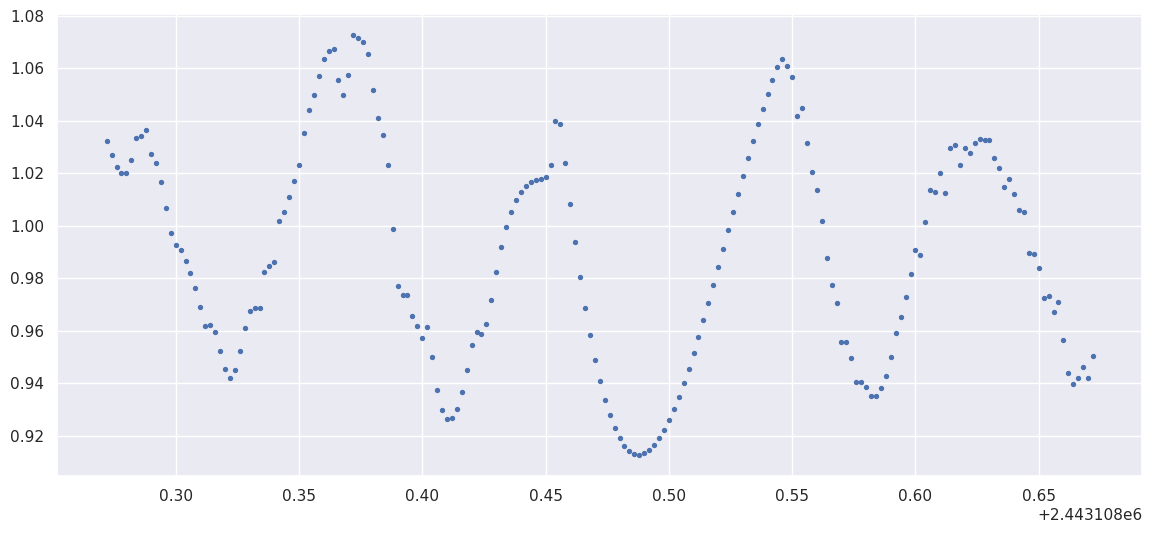

In [15]:
cubic_spline = CubicSpline(reduced_times, reduced_brightness)
brightness_test = cubic_spline(times_resolution)

_ = plt.scatter(times_resolution, brightness_test, s=8)

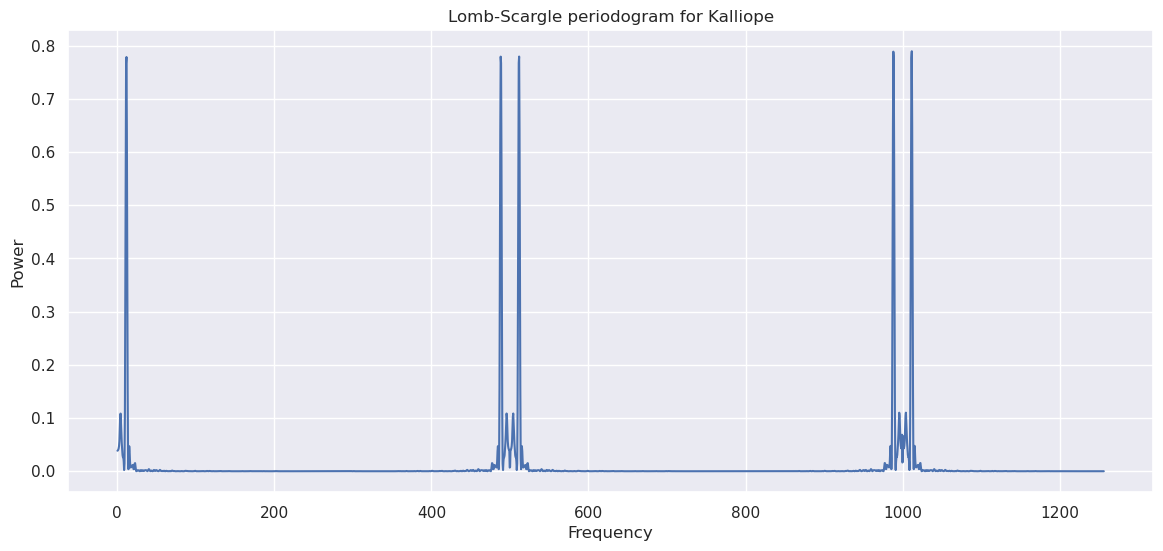

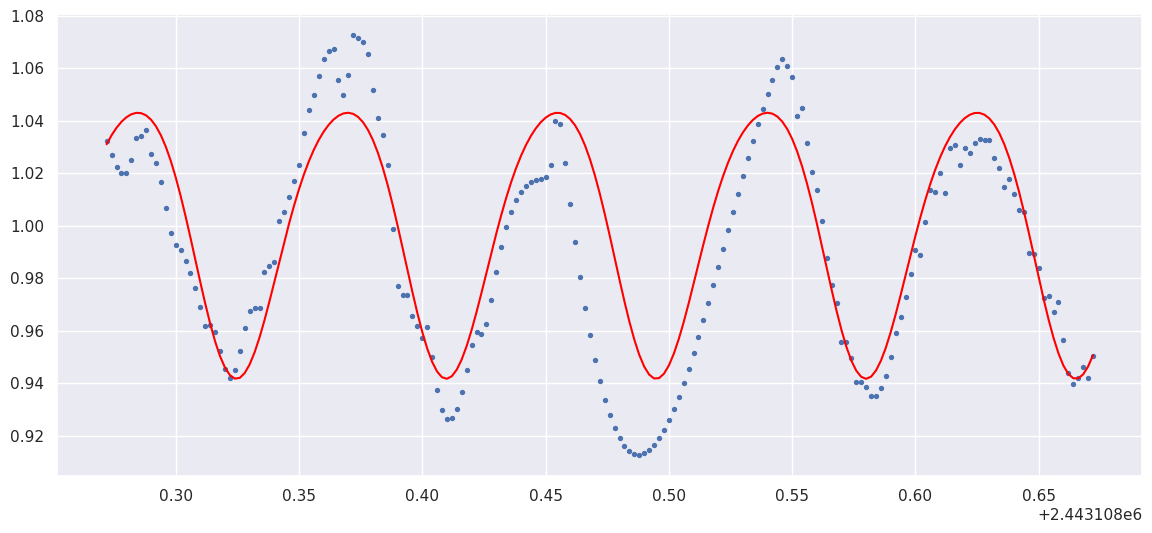

Best frequency: 1011.7500697276604
Rotational period: 0.023721273383712483h


In [16]:
frequency, power = LombScargle(times_resolution, brightness_test).autopower()
fig = plt.plot(frequency, power)

plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title(f"Lomb-Scargle periodogram for {asteroid_name}")
plt.show()

lomb_freq = frequency[np.argmax(power)]
lomb_period = 24 / lomb_freq

y_fit = ls.model(times_resolution, lomb_freq)
plt.scatter(times_resolution, brightness_test, s=8)
plt.plot(times_resolution, y_fit, color="red")
plt.show()


print(f"Best frequency: {lomb_freq}")
print(f"Rotational period: {lomb_period}h")

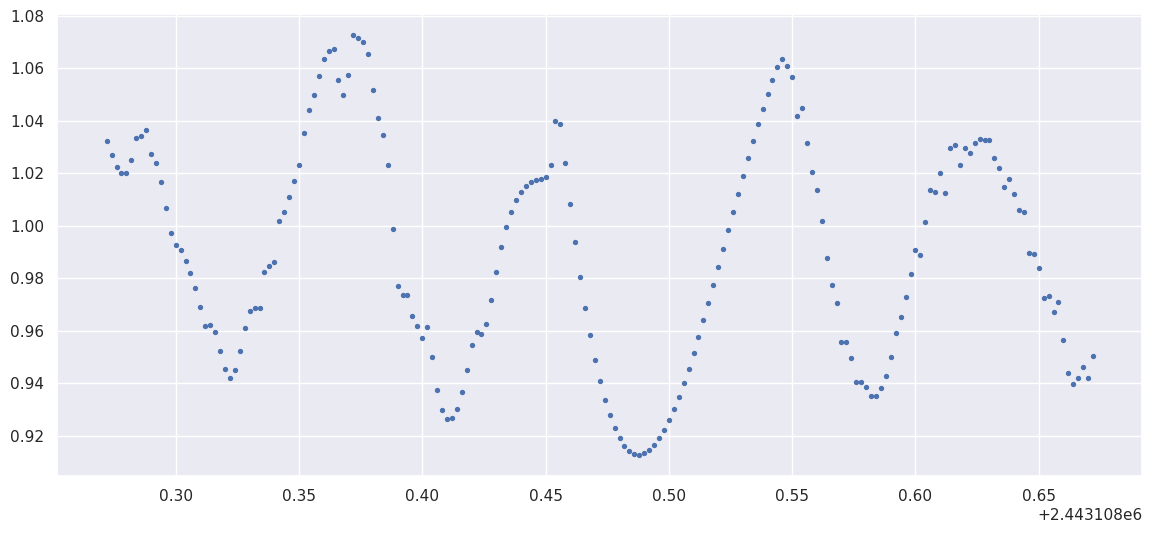

In [17]:
bspl = make_interp_spline(reduced_times, reduced_brightness, k=3)
brightness_test = bspl(times_resolution)

_ = plt.scatter(times_resolution, brightness_test, s=8)

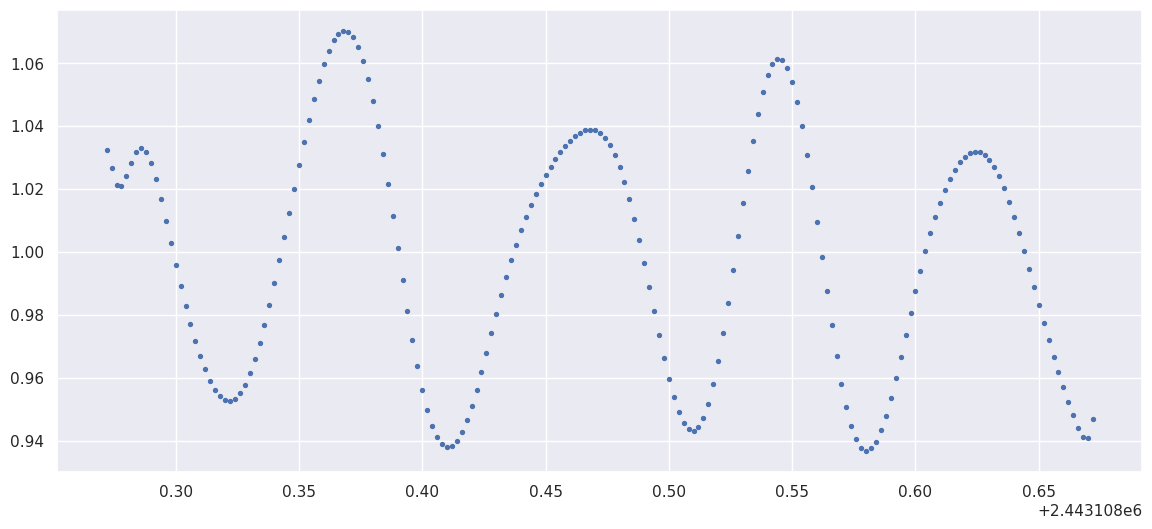

In [18]:
c = Chebyshev.fit(times, brightness, 25)
brightness_test = c(times_resolution)

_ = plt.scatter(times_resolution, brightness_test, s=8)